In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/usr/local/lib/python3.8/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [3]:
from mesh_tools import trimesh_utils as tu
from python_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
neurd.set_volume_params(
    volume = "microns"
)

# Data Prep: Loading mesh

In [5]:
from mesh_tools import trimesh_utils as tu

In [6]:
segment_id = 864691135510518224

In [7]:
mesh_filepath = f"./{segment_id}.off"
mesh_filepath = '864691135510518224_small_double_soma.off'
mesh = tu.load_mesh_no_processing(mesh_filepath)
mesh

<trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>

# Step 1: Decimation

In [ ]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_2_Decimation_v1.ipynb

In [8]:
decimation_kwargs = dict(
    decimation_ratio =0.25,
)

In [9]:
mesh_dec = tu.decimate(
    mesh,
    **decimation_kwargs
)

xvfb-run -n 2743 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_30333.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_30333_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/decimation_meshlab_25375011.mls


In [10]:
print(f"mesh = {mesh}")
print(f"mesh_dec = {mesh_dec}")

mesh = <trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>
mesh_dec = <trimesh.Trimesh(vertices.shape=(33683, 3), faces.shape=(80883, 3))>


In [11]:
ipvu.plot_objects(
    meshes = [mesh,mesh_dec],
    meshes_colors=["green","red"],
)

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 2: Some Identification

In [12]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_3_MeshFragment_full_v1.ipynb

In [13]:
from neurd import soma_extraction_utils as sm
sm.output_global_parameters_nuclei()

module: neurd.soma_extraction_utils data_type set to microns, algorithms = ['nuclei']
curr_dict = {'nucleus_min': 700 (None), 'nucleus_max': None (int unsigned), }
Unknown dict_name = global_parameters_dict_microns_nuclei


{'nucleus_min': 700 (None), 'nucleus_max': None (int unsigned), }

In [14]:
mesh_dec = mesh

In [15]:
(total_soma_list, 
 run_time, 
 total_soma_list_sdf,
 glia_pieces,
 nuclei_pieces) = sm.extract_soma_center(
    segment_id,
    mesh = mesh_dec,
    return_glia_nuclei_pieces=True,
    verbose = True,
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 8840 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_82605.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_82605_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_429315.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_82605.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_82605_remove_interior.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_429315.mls is being deleted....
There were 16 tot

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.769893]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 1951 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_504745.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_504745_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_348428.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_504745.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_504745_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_348428.mls is being deleted....
Inside sphere validater: ratio_val = 2.7266923461590085
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.781901, 0.3351845]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 8995 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_200613.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_200613_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_517470.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_200613.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_200613_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_517470.mls is being deleted....
Inside sphere validater: ratio_val = 2.130721459144365
Using Poisson Surface Reconstruction for watertightness in soma

xvfb-run -n 2423 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_97860.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_97860_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_32389.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Opening a file with extention off
FilterScript
Reading filter with name Remove Duplicate Vertices
Reading filter with name Remove Faces from

xvfb-run -n 9311 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_42536.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_42536_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_686313.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_42536.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_42536_poisson.off
mesh.is_watertight = False
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_686313.mls is being deleted....
Inside sphere validater: ratio_val = 2.779561458917224
About to add the following inside nuclei pieces after soma backtrack: [<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810

  0%|          | 0/9 [00:00<?, ?it/s]

Largest hole before segmentation = 84198.44608552229, after = 79686.03659527568,

ratio = 0.9464074493053798, difference = -4512.409490246602
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 4309 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_25583.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_25583_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_222711.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_25583.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_25583_fill_holes.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_222711.mls is being deleted....
xvfb-run -n 8105 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applicat

  0%|          | 0/2 [00:00<?, ?it/s]

No split meshes were above the width threshold (0.32) and size threshold (2000) so continuing
So just going with old somas
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>
 <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Not need to do a second pass because already found a soma


In [16]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_extraction_meshes(
    mesh_dec,
    total_soma_list,
    glia_pieces,
    nuclei_pieces,
    verbose = True,
)

# of somas = 2
# of glia = 0
# of nuclei = 18


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 3: Decomposition

In [17]:
from neurd import neuron

In [18]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Auto_Proof/m65_autoproof_4_Decomposition_full_v1.ipynb

In [19]:
neurd.set_volume_params(
    volume = "microns"
)

In [20]:
somas = [
 total_soma_list, 
 run_time, 
 total_soma_list_sdf,
]

picking a random 7 digit segment id: 67994723
--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
soma_mesh_list_centers = [array([1488880.76058317,  589300.09373793, 1100652.31345512]), array([1472182.71408549,  577993.08644009, 1112354.27575333])]
Getting Glia and Nuclei Pieces Subtracted Away 0.11245369911193848
 Splitting mesh after soma cancellation 1.9687163829803467
# of split_meshes = 4
 Containing Mesh Indices 0.02457451820373535
containing_mesh_indices = {0: 0, 1: 0}
 non_soma_touching_meshes 1.6

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/33579 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.5472085475921631
connecting at the root
branches_touching_root = [6]
combining close nodes
combine_threshold = 700
length of Graph = 3258
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.002908632942517017


  0%|          | 0/3 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Decomposing first pass: 2.744478702545166
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [635, 7670]
mesh_large_connectivity: 0.003184080123901367
Finding MAP candidates connected components: 0.00015211105346679688
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.07723569869995117
Grouping MP Sublimbs by Graph: 0.03602910041809082
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.012868165969848633
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8900 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/pois

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.01473855972290039
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.03715467453003
Checking connected components after removing cycles
Total time for mesh KDTree = 0.08401823043823242
sbv[0].reshape(-1,3) = [[1487208.   596715.8 1099876. ]]
closest_sk_pt_coord BEFORE = [1487600.  597255. 1100710.]
current_skeleton.shape = (299, 2, 3)
node_for_stitch = 211: [1487600.  597255. 1100710.]
node_for_stitch AFTER = 211: [1487600.  597255. 1100710.]
possible_node_loc = [  0  40 211 299]
possible_node_loc AFTER = [  0  40 211 299]
curr_shortest_path = [211]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1487600.  597255. 1100710.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1487600.,  597255., 11007

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (277, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 10.373896837234497
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7142 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_64176.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_64176_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_378999.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_64176.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuro

0it [00:00, ?it/s]

Total time for decomposition = 1.5699543952941895
mesh_correspondence_first_pass: 1.5699872970581055
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (277, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (277, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16026490066225166
 conflict_indices % = 0.026730885009030706


  0%|          | 0/16 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.352887868881226
correspondence_1_to_1: 0.3961613178253174
Total time for MAP sublimb processing 12.352962732315063
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.016118526458740234
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023770570755004883
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023921489715576172
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1491450.08344721  608267.60149996 1098228.13300974]
MP_branches_with_stitch_point = [0, 1]
MAP_branc

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17371511512832355
 conflict_indices % = 0.010556178663323876


  0%|          | 0/100 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1476472.93997195  615033.74821465 1108138.04148317]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.20631028281837502
 conflict_indices % = 0.0070295896681379765


  0%|          | 0/8 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.1909865005192108
 conflict_indices % = 0.04668743509865005


  0%|          | 0/58 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/4 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1488771.89112037  605282.82224157 1100475.99894991]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16864459712679575
 conflict_indices % = 0.006870705808869456


  0%|          | 0/7 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.23401195792023008
 conflict_indices % = 0.014455460531294937


  0%|          | 0/30 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 26.84508490562439
Number of matching vertices = 26
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1487600.  597255. 1100710.]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [4]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/10 [00:00<?, ?it/s]

66697 66698
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/10 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1484150.   588282.7 1095391. ]
Time for preparing soma vertices and root: 0.00017571449279785156
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20269 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.44699883460998535
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5975
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 25
empty_indices % = 0.0
 conflict_indices % = 0.010165121237665492


  0%|          | 0/11 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/25 [00:00<?, ?it/s]

Decomposing first pass: 3.0307374000549316
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.62396240234375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.7881393432617188e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.04164457321166992
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1483982.08022895  588135.81137922 1094821.63000965]
current_skeleton.shape = (556, 2, 3)
node_for_stitch = 556: [1483982.08022895  588135.81137922 1094821.63000965]
node_for_stitch AFTER = 556: [1483982.08022895  588135.81137922 1094821.63000965]
possible_node_loc = [  2 556]
possible_node_loc AFTER = [  2 556]
curr_shortest_path = [556]
Current stitch point was a branch or endpoi

  0%|          | 0/25 [00:00<?, ?it/s]

40338 40339
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/25 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1476534.   581771.6 1109552. ]
Time for preparing soma vertices and root: 0.00018405914306640625
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20030 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.31469154357910156
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 2074
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.002637462007987742


  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 1.6003282070159912
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2088]
mesh_large_connectivity: 0.00012040138244628906
Finding MAP candidates connected components: 7.367134094238281e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.05842995643615723
Grouping MP Sublimbs by Graph: 0.022963523864746094
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.013967275619506836
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9726 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poisso

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.007390499114990234
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.267145872116089
Checking connected components after removing cycles
Total time for mesh KDTree = 0.01732468605041504
sbv[0].reshape(-1,3) = [[1476534.   581771.6 1109552. ]]
closest_sk_pt_coord BEFORE = [1476750.  582508. 1109370.]
current_skeleton.shape = (68, 2, 3)
node_for_stitch = 0: [1476750.  582508. 1109370.]
node_for_stitch AFTER = 0: [1476750.  582508. 1109370.]
possible_node_loc = [ 0 68]
possible_node_loc AFTER = [ 0 68]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1476750.  582508. 1109370.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1476750.,  582508., 1109370.]])}
    Total time for

0it [00:00, ?it/s]

Total time for decomposition = 0.8448846340179443
mesh_correspondence_first_pass: 0.8449106216430664
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (68, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (68, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.14367816091954022
 conflict_indices % = 0.0


  0%|          | 0/4 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 8.421278476715088
correspondence_1_to_1: 0.13786697387695312
Total time for MAP sublimb processing 8.421348333358765
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.016994237899780273
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1481900.72163354  586937.6302398  1100472.34094648]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2257918665695411
 conflict_indices % = 0.009118082941900479


  0%|          | 0/135 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 18.271728038787842
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1476750.  582508. 1109370.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

39810 39811
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1474851.   571357.5 1113536. ]
Time for preparing soma vertices and root: 0.0002262592315673828
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11304 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 13.92it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.23032593727111816
connecting at the root
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 1216
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0026850443032310034


  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 0.6872177124023438
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.719329833984375e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.4543533325195312e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.13602375984191895
sbv[0].reshape(-1,3) = [[1474851.   571357.5 1113536. ]]
closest_sk_pt_coord BEFORE = [1478327.0746533   571496.39513115 1112568.79431172]
current_skeleton.shape = (816, 2, 3)
node_for_stitch = 79: [1478327.0746533   571496.39513115 1112568.79431172]
node_for_stitch AFTER = 79: [1478327.0746533   571496.39513115 1112568.79431172]
possible_node_loc = [  0 816]
possible_node_loc AFTER = [  0 816]
curr_shortest_path = [79, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20509891167097588
 conflict_indices % = 0.0


  0%|          | 0/51 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 87.57863521449462
curr_width_median = 443.69871185379054
curr_width_median = 382.3404931340948
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 2.6706440448760986
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 3.626556396484375
Number of matching vertices = 18
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1475123.88888889  571587.50555556 1113243.55555556]]
Number of end_nodes BEFORE filtering = 4
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

22345 22346
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1493560.   586779.1 1105606. ]
Time for preparing soma vertices and root: 0.0002028942108154297
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10788 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 16.06it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.23410582542419434
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 741
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.5770471096038818
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [20742]
mesh_large_connectivity: 0.00011754035949707031
Finding MAP candidates connected components: 7.009506225585938e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0074710845947265625
Grouping MP Sublimbs by Graph: 2.4318695068359375e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.05266141891479492
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 6200 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poi

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.01796436309814453
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 17.622913122177124
Checking connected components after removing cycles
Total time for mesh KDTree = 0.19265365600585938
sbv[0].reshape(-1,3) = [[1493560.   586779.1 1105606. ]]
closest_sk_pt_coord BEFORE = [1492680.  587102. 1106510.]
current_skeleton.shape = (748, 2, 3)
node_for_stitch = 195: [1492680.  587102. 1106510.]
node_for_stitch AFTER = 195: [1492680.  587102. 1106510.]
possible_node_loc = [  0  51 126 146 175 195 324 415 567 579 583 610 704 719 748]
possible_node_loc AFTER = [  0  51 126 146 175 195 324 415 567 579 583 610 704 719 748]
curr_shortest_path = [195]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1492680.  587102. 1106510.]
skipping soma 0 because closest skele

  0%|          | 0/10 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (691, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 19.045532941818237
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5480 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_59705.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_59705_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_65159.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_59705.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron

0it [00:00, ?it/s]

Total time for decomposition = 3.4577667713165283
mesh_correspondence_first_pass: 3.4578440189361572
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (691, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (691, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.1681612187831453
 conflict_indices % = 0.04078680937228811


  0%|          | 0/57 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 24.43351697921753
correspondence_1_to_1: 1.8774521350860596
Total time for MAP sublimb processing 24.4335880279541
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 25.272358179092407
Number of matching vertices = 60
Number of matching vertices = 13
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1474820.  582858. 1113480.]
 [1492680.  587102. 1106510.]]
Number of end_nodes BEFORE filtering = 5
all_single_nodes_to_eliminate = [0, 2]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/7 [00:00<?, ?it/s]

20741 20742
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1486653.   594244.2 1104480. ]
Time for preparing soma vertices and root: 0.00020241737365722656
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9843 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 22.25it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2387986183166504
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 818
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 1.101233720779419
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0994415283203125e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.4543533325195312e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.1416771411895752
sbv[0].reshape(-1,3) = [[1486653.   594244.2 1104480. ]]
closest_sk_pt_coord BEFORE = [1486547.7606223   594609.92820407 1104601.87572914]
current_skeleton.shape = (817, 2, 3)
node_for_stitch = 817: [1486547.7606223   594609.92820407 1104601.87572914]
node_for_stitch AFTER = 817: [1486547.7606223   594609.92820407 1104601.87572914]
possible_node_loc = [334 817]
possible_node_loc AFTER = [334 817]
curr_shortest_path = [817]
Current stitch point was a branch or endpoi

  0%|          | 0/1 [00:00<?, ?it/s]

19361 19362
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1491272.  582425. 1102199.]
Time for preparing soma vertices and root: 0.0002665519714355469
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7350 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 22.06it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1790907382965088
connecting at the root
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 734
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.4427499771118164
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.412101745605469e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2411346435546875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.5008847713470459
sbv[0].reshape(-1,3) = [[1491272.  582425. 1102199.]]
closest_sk_pt_coord BEFORE = [1491378.93502276  582020.70946596 1101822.28585048]
current_skeleton.shape = (733, 2, 3)
node_for_stitch = 1: [1491378.93502276  582020.70946596 1101822.28585048]
node_for_stitch AFTER = 1: [1491378.93502276  582020.70946596 1101822.28585048]
possible_node_loc = [  0 708]
possible_node_loc AFTER = [  0 708]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpoint, 

  0%|          | 0/1 [00:00<?, ?it/s]

14575 14576
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1468936.   574693.8 1112623. ]
Time for preparing soma vertices and root: 0.00032591819763183594
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2055 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 48.01it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1259171962738037
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 117
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.31569719314575195
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3349]
mesh_large_connectivity: 0.0002319812774658203
Finding MAP candidates connected components: 0.00010609626770019531
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0034897327423095703
Grouping MP Sublimbs by Graph: 4.1484832763671875e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.02191948890686035
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7148 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/po

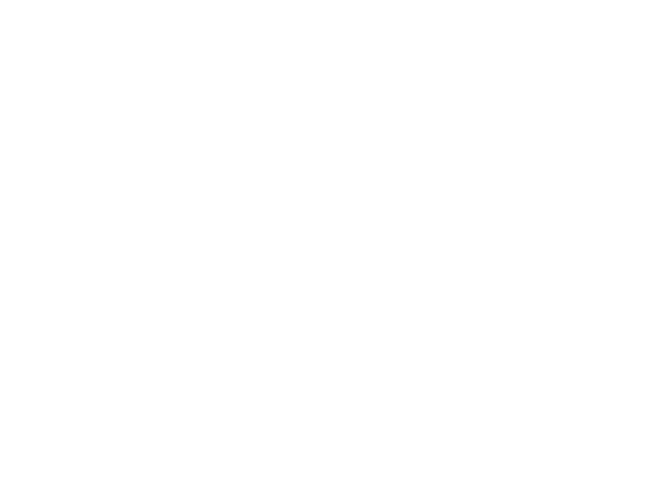

0it [00:00, ?it/s]

len(leftover_meshes_sig) = [<trimesh.Trimesh(vertices.shape=(2056, 3), faces.shape=(3349, 3))>]


  0%|          | 0/1 [00:00<?, ?it/s]

invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2055 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 60.34it/s]

Time for sk_meshparty_obj = 0.056257009506225586
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 117
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [6273.16175543]
width_median= 6273.161755431171
Time for correspondence = 0.1607987880706787
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02961421012878418
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.867382049560547
Checking connected components after removing cycles
Total time for mesh KDTree = 0.043881893157958984
sbv[0].reshape(-1,3) = [[1468936.   574693.8 1112623. ]]
closest_sk_pt_coord BEFORE = [1467110.60911576  578567.92374513 1112556.22084362]
current_skeleton.shape = (118, 2, 3)
node_for_stitch = 3: [1467110.60911576  578567.92374513 1112556.22084362]
node_for_stitch AFTER = 3: [1467110.60911576  578567.92374513 1112556.22084362]
possible_node_loc = [  0 106 117]
possible_node_loc AFTER = [  0 106 117]
curr_shortest_path = [3, 1.0, 2.0, 4.0, 0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1355.0746115010047
Changing the stitch point becasue the distance to end or branch node was 1355.0746115010047
New stitch poi

0it [00:00, ?it/s]

Total time for decomposition = 0.9753425121307373
mesh_correspondence_first_pass: 0.9753704071044922
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (117, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (117, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3350253807106599
 conflict_indices % = 0.1439235592714243


  0%|          | 0/4 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.36754298210144
correspondence_1_to_1: 0.29129958152770996
Total time for MAP sublimb processing 13.367627620697021
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 13.818224668502808
Number of matching vertices = 90
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1466300.  578903. 1113230.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

3348 3349
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 110.18011736869812


 ----- Working on Stitching ----------
Inside attach_floating_pieces_to_limb_correspondence
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(113, 3), faces.shape=(176, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 4.76837158203125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 83.27it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029356002807617188
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [400.71835841]
width_median= 400.7183584072228
segment_widths_median = [400.71835841]
Decomposing first pass: 0.04000735282897949
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.409385681152344e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.4318695068359375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07069993019104004
Using Distance measure skeletal_distance


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12217926979064941
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(140, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 4.5299530029296875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 76.08it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.026894330978393555
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 24
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [160.00241781]
width_median= 160.00241781081257
segment_widths_median = [160.00241781]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 75.52it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06361579895019531
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 34
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [160.057286]
width_median= 160.0572859965776
segment_widths_median = [160.057286]
Using the axon parameters
Decomposing first pass: 0.0383298397064209
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2411346435546875e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.7881393432617188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1336650848388672
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

139 140
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.22437477111816406
winning_float = 1
winning_float_match_main_limb = 1
winning_float_dist = 149.5869181909169
main_limb_stitch_point = [1454928.38848372  617422.14351492 1109437.08084759]
floating_limb_stitch_point = [1455057.   617365.2 1109488. ]
node_for_stitch = 1795: [1454928.38848372  617422.14351492 1109437.08084759]
node_for_stitch AFTER = 1795: [1454928.38848372  617422.14351492 1109437.08084759]
possible_node_loc = [   0  136  440  586 1094 1284 1353 1466 2499 3964 4341 4358 5744 5814
 5965  577  688 1089 1114 1389 1640 1693 2508 2844 4194 5319]
possible_node_loc AFTER = [   0  136  440  577  586  688 1089 1094 1114 1284 1353 1389 1466 1640
 1693 2499 2508 2844 3964 4194 4358 5319 5744 5814 5965]
curr_shortest_path = [1795, 1784.0, 1773.0, 1761.0, 1750.0, 1733.0, 1716.0, 1702.0, 1687.0, 1678.0, 1671.0, 1664.0, 1656.0, 1649.0, 1641.0, 1636.0, 1632.0, 1627.0, 1623.0, 1596.0, 1576.0, 1566.0, 1556.0, 1548.0, 1540.0, 1530.0, 1523.0, 1515.0, 1507.0, 1499.0, 1491.0, 1484

    current_width= 111.9796517426644
Working on limb L1 branch 3
    current_width= 95.32640663158229
Working on limb L1 branch 7
    current_width= 98.83860043143284
Working on limb L1 branch 8
    current_width= 131.75016231242103
Working on limb L1 branch 5
    current_width= 126.81287846359538
Working on limb L1 branch 6
    current_width= 108.30020672887802
Working on limb L1 branch 0
    current_width= 97.68811695225403
Working on limb L1 branch 2
    current_width= 124.05424098811216
Working on limb L1 branch 23
    current_width= 87.93425564048837
Working on limb L1 branch 24
    current_width= 82.4982383186942
Working on limb L4 branch 2
    current_width= 972.1627754063986
Working on limb L4 branch 0
    current_width= 433.15837216708974
Working on limb L4 branch 3
    current_width= 696.4540376980359
Working on limb L4 branch 1
    current_width= 291.2072778113148
Working on limb L4 branch 4
    current_width= 507.9948344655454
Working on limb L4 branch 5
    current_width= 

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 103



  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 93



  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 81



  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 180



  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 150



  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 163



  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 114



  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 54



  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 79



  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 134



  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 120



  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 6
    No spines and using precomputed width: 586.7644191749422
Working on limb L0 branch 3
    current_width= 416.7881587153977
Working on limb L0 branch 7
    No spines and using precomputed width: 368.99402526275117
Working on limb L0 branch 0
    current_width= 264.2172601478005
Working on limb L0 branch 1
    current_width= 272.5726579178621
Working on limb L0 branch 2
    current_width= 285.4542937461846
Working on limb L0 branch 4
    current_width= 301.21669775687826
Working on limb L0 branch 8
    No spines and using precomputed width: 309.59023977471134
Working on limb L0 branch 5
    current_width= 231.62097815579966
Working on limb L0 branch 9
    current_width= 277.4903707521639
Working on limb L1 branch 17
    current

In [21]:
neuron_obj = neuron.Neuron(
    mesh = mesh,
    somas = somas,
    suppress_preprocessing_print=False,
    suppress_output=False,
    glia_meshes=glia_pieces,
    nuclei_meshes = nuclei_pieces,
)

In [22]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

## calculating statistics about neuron

In [25]:
from neurd.microns_volume_utils import data_interface as hdju
voxel_adjustment_vector = hdju.voxel_to_nm_scaling

stats_dict = neuron_obj.neuron_stats(stats_to_ignore = [
                    "n_boutons",
                     "axon_length",
                     "axon_area",
                     "max_soma_volume",
                     "max_soma_n_faces",],
    include_skeletal_stats = True,
    include_centroids= True,
    voxel_adjustment_vector=voxel_adjustment_vector,
)

stats_dict

Total Number of Branches = 55
n_short_branches = 11, n_medium_branches = 41, n_long_branches = 3
axon_length = 1606.7293624335382, axon_branch_length_median = 16.735647518195066, axon_branch_length_mean = 29.21326113515524
bbox_volume = 1.9824080633351482
bbox_corners = [[1430458.66683036  502584.20727049 1020174.81709652]
 [1564397.98216806  659939.53090215 1114234.50651442]]
bbox_corners_soma_relative = [[-58422.09375281 -86715.88646744 -80477.4963586 ]
 [ 75517.22158489  70639.43716422  13582.1930593 ]]


{'n_vertices': 154713,
 'n_faces': 323535,
 'max_soma_area': 341.07163148783616,
 'n_not_processed_soma_containing_meshes': 0,
 'n_error_limbs': 1,
 'n_same_soma_multi_touching_limbs': 0,
 'n_multi_soma_touching_limbs': 1,
 'n_somas': 2,
 'n_limbs': 8,
 'n_branches': 57,
 'max_limb_n_branches': 27,
 'skeletal_length': 1543052.6489920912,
 'max_limb_skeletal_length': 604558.5039643556,
 'median_branch_length': 14983.573,
 'width_median': 186.744,
 'width_no_spine_median': 186.744,
 'width_90_perc': 456.123,
 'width_no_spine_90_perc': 449.849,
 'n_spines': 399,
 'spine_density': 0.0002585783448546771,
 'spines_per_branch': 7.0,
 'skeletal_length_eligible': 1022768.485,
 'n_spine_eligible_branches': 35,
 'spine_density_eligible': 0.00039011761298061504,
 'spines_per_branch_eligible': 11.4,
 'total_spine_volume': 36940846334.45009,
 'spine_volume_median': 64090430.61665852,
 'spine_volume_density': 23940.10752554654,
 'spine_volume_density_eligible': 36118.483191677624,
 'spine_volume_per_

## skeleton and skeleton stats

In [26]:
skeleton = neuron_obj.skeleton

ipvu.plot_objects(
    main_skeleton=skeleton
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [28]:
from neurd import neuron_statistics as nst

sk_stats = nst.skeleton_stats_from_neuron_obj(
    neuron_obj,
    include_centroids=True,
    voxel_adjustment_vector=voxel_adjustment_vector,
    verbose = True
)

sk_stats

Total Number of Branches = 55
n_short_branches = 11, n_medium_branches = 41, n_long_branches = 3
axon_length = 1606.7293624335382, axon_branch_length_median = 16.735647518195066, axon_branch_length_mean = 29.21326113515524
bbox_volume = 1.9824080633351482
bbox_corners = [[1430458.66683036  502584.20727049 1020174.81709652]
 [1564397.98216806  659939.53090215 1114234.50651442]]
bbox_corners_soma_relative = [[-58422.09375281 -86715.88646744 -80477.4963586 ]
 [ 75517.22158489  70639.43716422  13582.1930593 ]]


{'skeletal_length': 1543052.648992091,
 'n_branches': 57,
 'branch_length_median': 16.735647518195066,
 'branch_length_mean': 29.21326113515524,
 'n_short_branches': 11,
 'n_long_branches': 3,
 'n_medium_branches': 41,
 'bbox_volume': 1.9824080633351482,
 'bbox_x_min': 1430458.6668303611,
 'bbox_y_min': 502584.2072704911,
 'bbox_z_min': 1020174.8170965186,
 'bbox_x_max': 1564397.9821680577,
 'bbox_y_max': 659939.5309021459,
 'bbox_z_max': 1114234.506514418,
 'bbox_x_min_soma_relative': -58422.0937528112,
 'bbox_y_min_soma_relative': -86715.88646743615,
 'bbox_z_min_soma_relative': -80477.49635860184,
 'bbox_x_max_soma_relative': 75517.22158488538,
 'bbox_y_max_soma_relative': 70639.43716421863,
 'bbox_z_max_soma_relative': 13582.193059297511,
 'n_limbs': 8,
 'centroid_x_nm': 1488880.7605831723,
 'centroid_y_nm': 589300.0937379273,
 'centroid_z_nm': 1100652.3134551204,
 'centroid_x': 372220,
 'centroid_y': 147325,
 'centroid_z': 27516,
 'centroid_volume': 440.7405976697012}

# Step 4: Split Multi-Soma Merges

In [ ]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Auto_Proof/m65_autoproof_5_DecompositionSplitMultiSoma_full_v1.ipynb

In [64]:
from neurd import proofreading_utils as pru

neurd.set_volume_params(
    "microns"
)

In [65]:
plot_intermediates = True
plot_suggestions = True
plot_cut_coordinates = True
only_multi_soma_paths = False
verbose = True

multi_soma_limbs = [4]
multi_touch_limbs = []


 -------- Working on limb 4------------
Starting combinations to process = [[2 0]]


---- working on disconnecting 2 and 0
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [2, 0]
remove_segment_threshold = 1500
high_degree_endpoint_coordinates_tried = []
consider_path_neighbors_for_removal is set so segments_to_consider = [3]
Trying combining short segments with a larger threshold 2500
Short segments to combine = [3]


-------- Removing Segments -------------
curr_short_seg_revised = 3
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[1493440.  587207. 1108650.]
 [1494840.  586448. 1109900.]]
new_stitch_point = [1494140.   586827.5 1109275. ]
Angles for [2 0 1 4] are [34.07, 95.93, 85.57, 45.76]
Branch that will absorb mesh of 3 is 2 
Revised cut path = [2

  0%|          | 0/1 [00:00<?, ?it/s]

  Edge: [2 0]: curr_angle = 77.49
Total time for doubling_back = 0.031178712844848633
high_degree_endpoint_coordinates_widths = [551.1308149625871]
high_degree_order = [0]
Picking [1494140.   586827.5 1109275. ] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
Inisde resolving_crossovers: debug_dict=/n{'apply_width_filter': True, 'best_match_width_diff_max': 75, 'best_match_width_diff_max_perc': 0.6, 'best_match_width_diff_min': 0.25, 'best_singular_match': True, 'lowest_angle_sum_for_pairs': False}
coordinate = [1494140.   586827.5 1109275. ]
coordinate_branches = [0, 1, 2, 4]
0 = red
1 = aqua
2 = purple
4 = green


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

edges_to_avoid= None
Angle between 0 and 1 = 161.14 
Angle between 0 and 2 = 60.14 
width_diff = 539.0044032393089, width_diff_perc = 0.5544384303482367

Angle between 0 and 4 = 63.18 
width_diff = 74.83646229845567, width_diff_perc = 0.14731736864448655

Angle between 1 and 2 = 57.33 
width_diff = 680.9554975950839, width_diff_perc = 0.7004541984344342

Not adding edge [1, 2] because width_diff= 680.9554975950839, width_diff_perc= = 0.7004541984344342
Angle between 1 and 4 = 61.91 
width_diff = 216.78755665423063, width_diff_perc = 0.42675149813739727

Angle between 2 and 4 = 60.78 
width_diff = 464.1679409408532, width_diff_perc = 0.4774590764872833

Final Matches = [[0, 2], [0, 4], [1, 4], [2, 4]]
matched_branches_revised = [[0, 2], [1, 4]]
Aligned Skeleton Parts


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Original graph


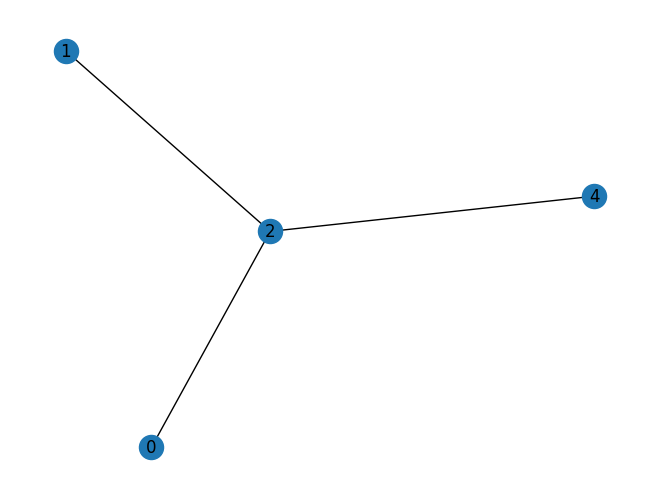

match_branches = [[0, 2], [1, 4]]
branches_to_avoid= []
1: No Pair so adding back old edge
1: Old neighbors = [2]
4: No Pair so adding back old edge
4: Old neighbors = [2]
new_neighbors = [[1, 2], [2, 4]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 4]]
edges_to_create (resolve crossover) = [[0, 2], [1, 4], [1, 2], [2, 4]]
nx.number_connected_components(G) before = 1
G.edges() = [(2, 0)]
G.nodes() = [2, 0]
nx.number_connected_components(G) after = 1
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  0%|          | 0/1 [00:00<?, ?it/s]

  Edge: [2 0]: curr_angle = 77.49
Total time for doubling_back = 0.02703237533569336

Attempting the width jump check (ARTIFICIALLY ATTEMPTING FROM BOTH SIDES)
width_jump_threshold = 200
  Edge: [2 0]: jump = -532.65
Total time for width = 0.022286653518676758
Did not find an error edge in either of the paths
Number of connected components = 2
Comp 0 = {0, 1, 2, 4, 5, 6}
Comp 1 = {3}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
--> So Setting the default_cut_edge to last
edges_to_delete (cut_limb_network) = [[2, 0]]
edges_to_create = []
edge_diff = [[2 0]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1494140.   586827.5 1109275. ]]




Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


**** Computing red blue splits****
Conn comp size before expansion = [5, 1]
Not expanding to removed branches

--Doing Red/Blue splits for S0_0
error_branches=[1 2 4 5 6]
valid_upstream_branches_restriction = [0]
Error Branches = [1 2 4 5 6]

**conn_comp_errors = [[2], [1], [4, 5, 6]]
Grouping all conn comp together

**conn_comp_errors AFTER PAIRING = [[2, 1, 4, 5, 6]]
Working on connected component: [2, 1, 4, 5, 6]
Branch 2 had a valid upstream node 0 with common endpoint [[1494140.   586827.5 1109275. ]]
Branch 1 had a valid upstream node 0 with common endpoint [[1494140.   586827.5 1109275. ]]
Branch 4 had a valid upstream node 0 with common endpoint [[1494140.   586827.5 1109275. ]]
Skipping upstream node 4 because was not in valid_upstream_bra

point_array= [[1493276.53596579  587269.26560726 1109505.43425742]
 [1492525.72486999  587673.89764579 1109951.10287531]
 [1491981.30011387  587974.37648586 1110724.82928437]]
Deciding between min_cancel_distance = 962.3226616714535, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 0 node offset skeleton coordinate is [1493276.53596579  587269.26560726 1109505.43425742]
 --> using closest_mesh_face method curr_points = [[1493480.33333333  587423.53333333 1109805.66666667]]
red 0 node offset skeleton coordinate is [1492525.72486999  587673.89764579 1109951.10287531]
 --> using closest_mesh_face method curr_points = [[1492041.33333333  587758.66666667 1109846.        ]]
red 0 node offset skeleton coordinate is [1491981.30011387  587974.37648586 1110724.82928437]
 --> using closest_mesh_face method curr_points = [[1492224.33333333  588010.93333333 1110983.66666667]]

For Pair 1: coordinate [[1494140.   586827.5 1109275. ]]
point_array= [[1494258.2594134 

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

{4: [{'starting_node_1': 2,
   'starting_node_2': 0,
   'title': 'S0_0 from S1_0 ',
   'edges_to_delete': [[2, 0]],
   'edges_to_create': [],
   'removed_branches': [3],
   'coordinate_suggestions': [array([1494140. ,  586827.5, 1109275. ])],
   'successful_disconnection': True,
   'paths_not_cut': [],
   'paths_cut': [array([[1474820.        ,  582858.        , 1113480.        ],
           [1476671.04999907,  583333.4931249 , 1112958.35625035],
           [1478493.22179176,  583780.41634382, 1112385.64591404],
           [1479867.62664161,  585160.28799248, 1112383.19059708],
           [1481744.05357596,  585457.92351107, 1111903.98660601],
           [1483631.3859346 ,  585305.69893645, 1111963.79531153],
           [1485432.80605438,  585572.94772961, 1111482.54470242],
           [1486777.99158813,  586494.43532986, 1112717.02944155],
           [1487146.44785555,  586067.27797744, 1111088.22392778],
           [1487678.79101142,  587815.36330806, 1113718.37788776],
           [1

In [73]:
(split_results,
red_blue_split_results) = pru.multi_soma_split_suggestions(
    neuron_obj,
    plot_intermediates=plot_intermediates,
    plot_suggestions=plot_suggestions,
    plot_cut_coordinates = plot_cut_coordinates,
    only_multi_soma_paths=only_multi_soma_paths,
    default_cut_edge = "last",
    verbose = verbose,
    output_red_blue_suggestions = True,
    split_red_blue_by_common_upstream = True,
    apply_valid_upstream_branches_restriction = True,
    debug_red_blue = False,
)

In [140]:
from neurd import soma_splitting_utils as ssu
ssu.plot_red_blue_split_suggestions_per_limb(
    neuron_obj,
    red_blue_split_results,
    
)



-------- Suggestions for Limb 4------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…